In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('../data/Diamond_Prices.csv')
df.head()

,price,carat,cut,color,clarity,table,length,width,depth
0,1053,0.48,Very Good,I,VS1,55.0,4.99,5.03,3.12
1,584,0.34,Premium,D,SI1,58.0,4.43,4.47,2.76
2,9005,1.04,Ideal,F,VVS2,57.0,6.50,6.53,3.99
3,2056,0.70,Premium,G,SI2,61.0,5.66,5.63,3.49
4,9407,1.57,Very Good,H,VS2,56.0,7.46,7.40,4.71


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    500 non-null    int64  
 1   carat    500 non-null    float64
 2   cut      500 non-null    object 
 3   color    500 non-null    object 
 4   clarity  500 non-null    object 
 5   table    500 non-null    float64
 6   length   500 non-null    float64
 7   width    500 non-null    float64
 8   depth    500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [10]:
df.isnull().sum().to_frame('Null Count')

,Null Count
price,0
carat,0
cut,0
color,0
clarity,0
table,0
length,0
width,0
depth,0


In [11]:
df.duplicated().to_frame('Has Duplicated')

,Has Duplicated
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [12]:
# Fair, Good, Very Good, Premium, Ideal
# Cut: 1, 2, 3, 4, 5

# change the cut column to numerical, create new column
df['cut_rating'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})

In [13]:
# I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
# Clarity: 1, 2, 3, 4, 5, 6, 7, 8

# change the clarity column to numerical
df['clarity_rating'] = df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [14]:
# J (worst) to D (best)
# Color: 1, 2, 3, 4, 5, 6, 7

# change the color column to numerical
df['color_rating'] = df['color'].map({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7})

In [15]:
filtered_df = df[['carat', 'cut_rating', 'clarity_rating', 'color_rating', 'price', 'depth', 'table', 'length', 'width']]

In [16]:
filtered_df.head()

,carat,cut_rating,clarity_rating,color_rating,price,depth,table,length,width
0,0.48,3,5,2,1053,3.12,55.0,4.99,5.03
1,0.34,4,3,7,584,2.76,58.0,4.43,4.47
2,1.04,5,6,5,9005,3.99,57.0,6.50,6.53
3,0.70,4,2,4,2056,3.49,61.0,5.66,5.63
4,1.57,3,4,3,9407,4.71,56.0,7.46,7.40


In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           500 non-null    float64
 1   cut_rating      500 non-null    int64  
 2   clarity_rating  500 non-null    int64  
 3   color_rating    500 non-null    int64  
 4   price           500 non-null    int64  
 5   depth           500 non-null    float64
 6   table           500 non-null    float64
 7   length          500 non-null    float64
 8   width           500 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 35.3 KB


In [18]:
# correlation matrix
corr = filtered_df.corr()

In [19]:
corr

,carat,cut_rating,clarity_rating,color_rating,price,depth,table,length,width
carat,1.000000,-0.020533,-0.341896,-0.331302,0.928785,0.978326,0.121974,0.977496,0.976793
cut_rating,-0.020533,1.000000,0.209884,-0.022207,0.062750,-0.042538,-0.427128,-0.012367,-0.010322
clarity_rating,-0.341896,0.209884,1.000000,-0.041488,-0.145698,-0.369471,-0.220119,-0.366518,-0.358583
color_rating,-0.331302,-0.022207,-0.041488,1.000000,-0.214469,-0.327749,0.074899,-0.318401,-0.321240
price,0.928785,0.062750,-0.145698,-0.214469,1.000000,0.883377,0.070783,0.888251,0.890327
depth,0.978326,-0.042538,-0.369471,-0.327749,0.883377,1.000000,0.115547,0.992401,0.992269
table,0.121974,-0.427128,-0.220119,0.074899,0.070783,0.115547,1.000000,0.145130,0.134520
length,0.977496,-0.012367,-0.366518,-0.318401,0.888251,0.992401,0.145130,1.000000,0.998967
width,0.976793,-0.010322,-0.358583,-0.321240,0.890327,0.992269,0.134520,0.998967,1.000000


<Axes: >

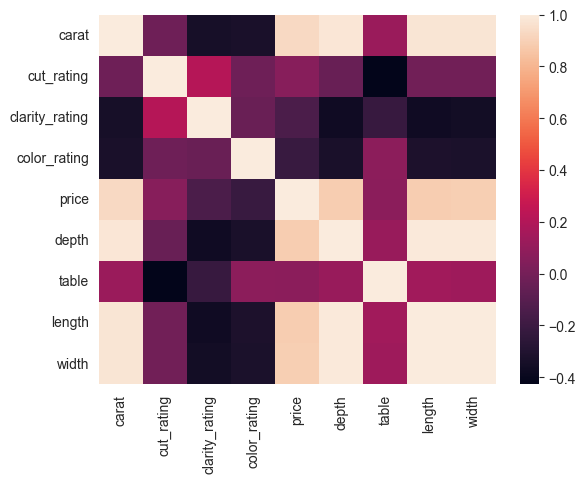

In [20]:
# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

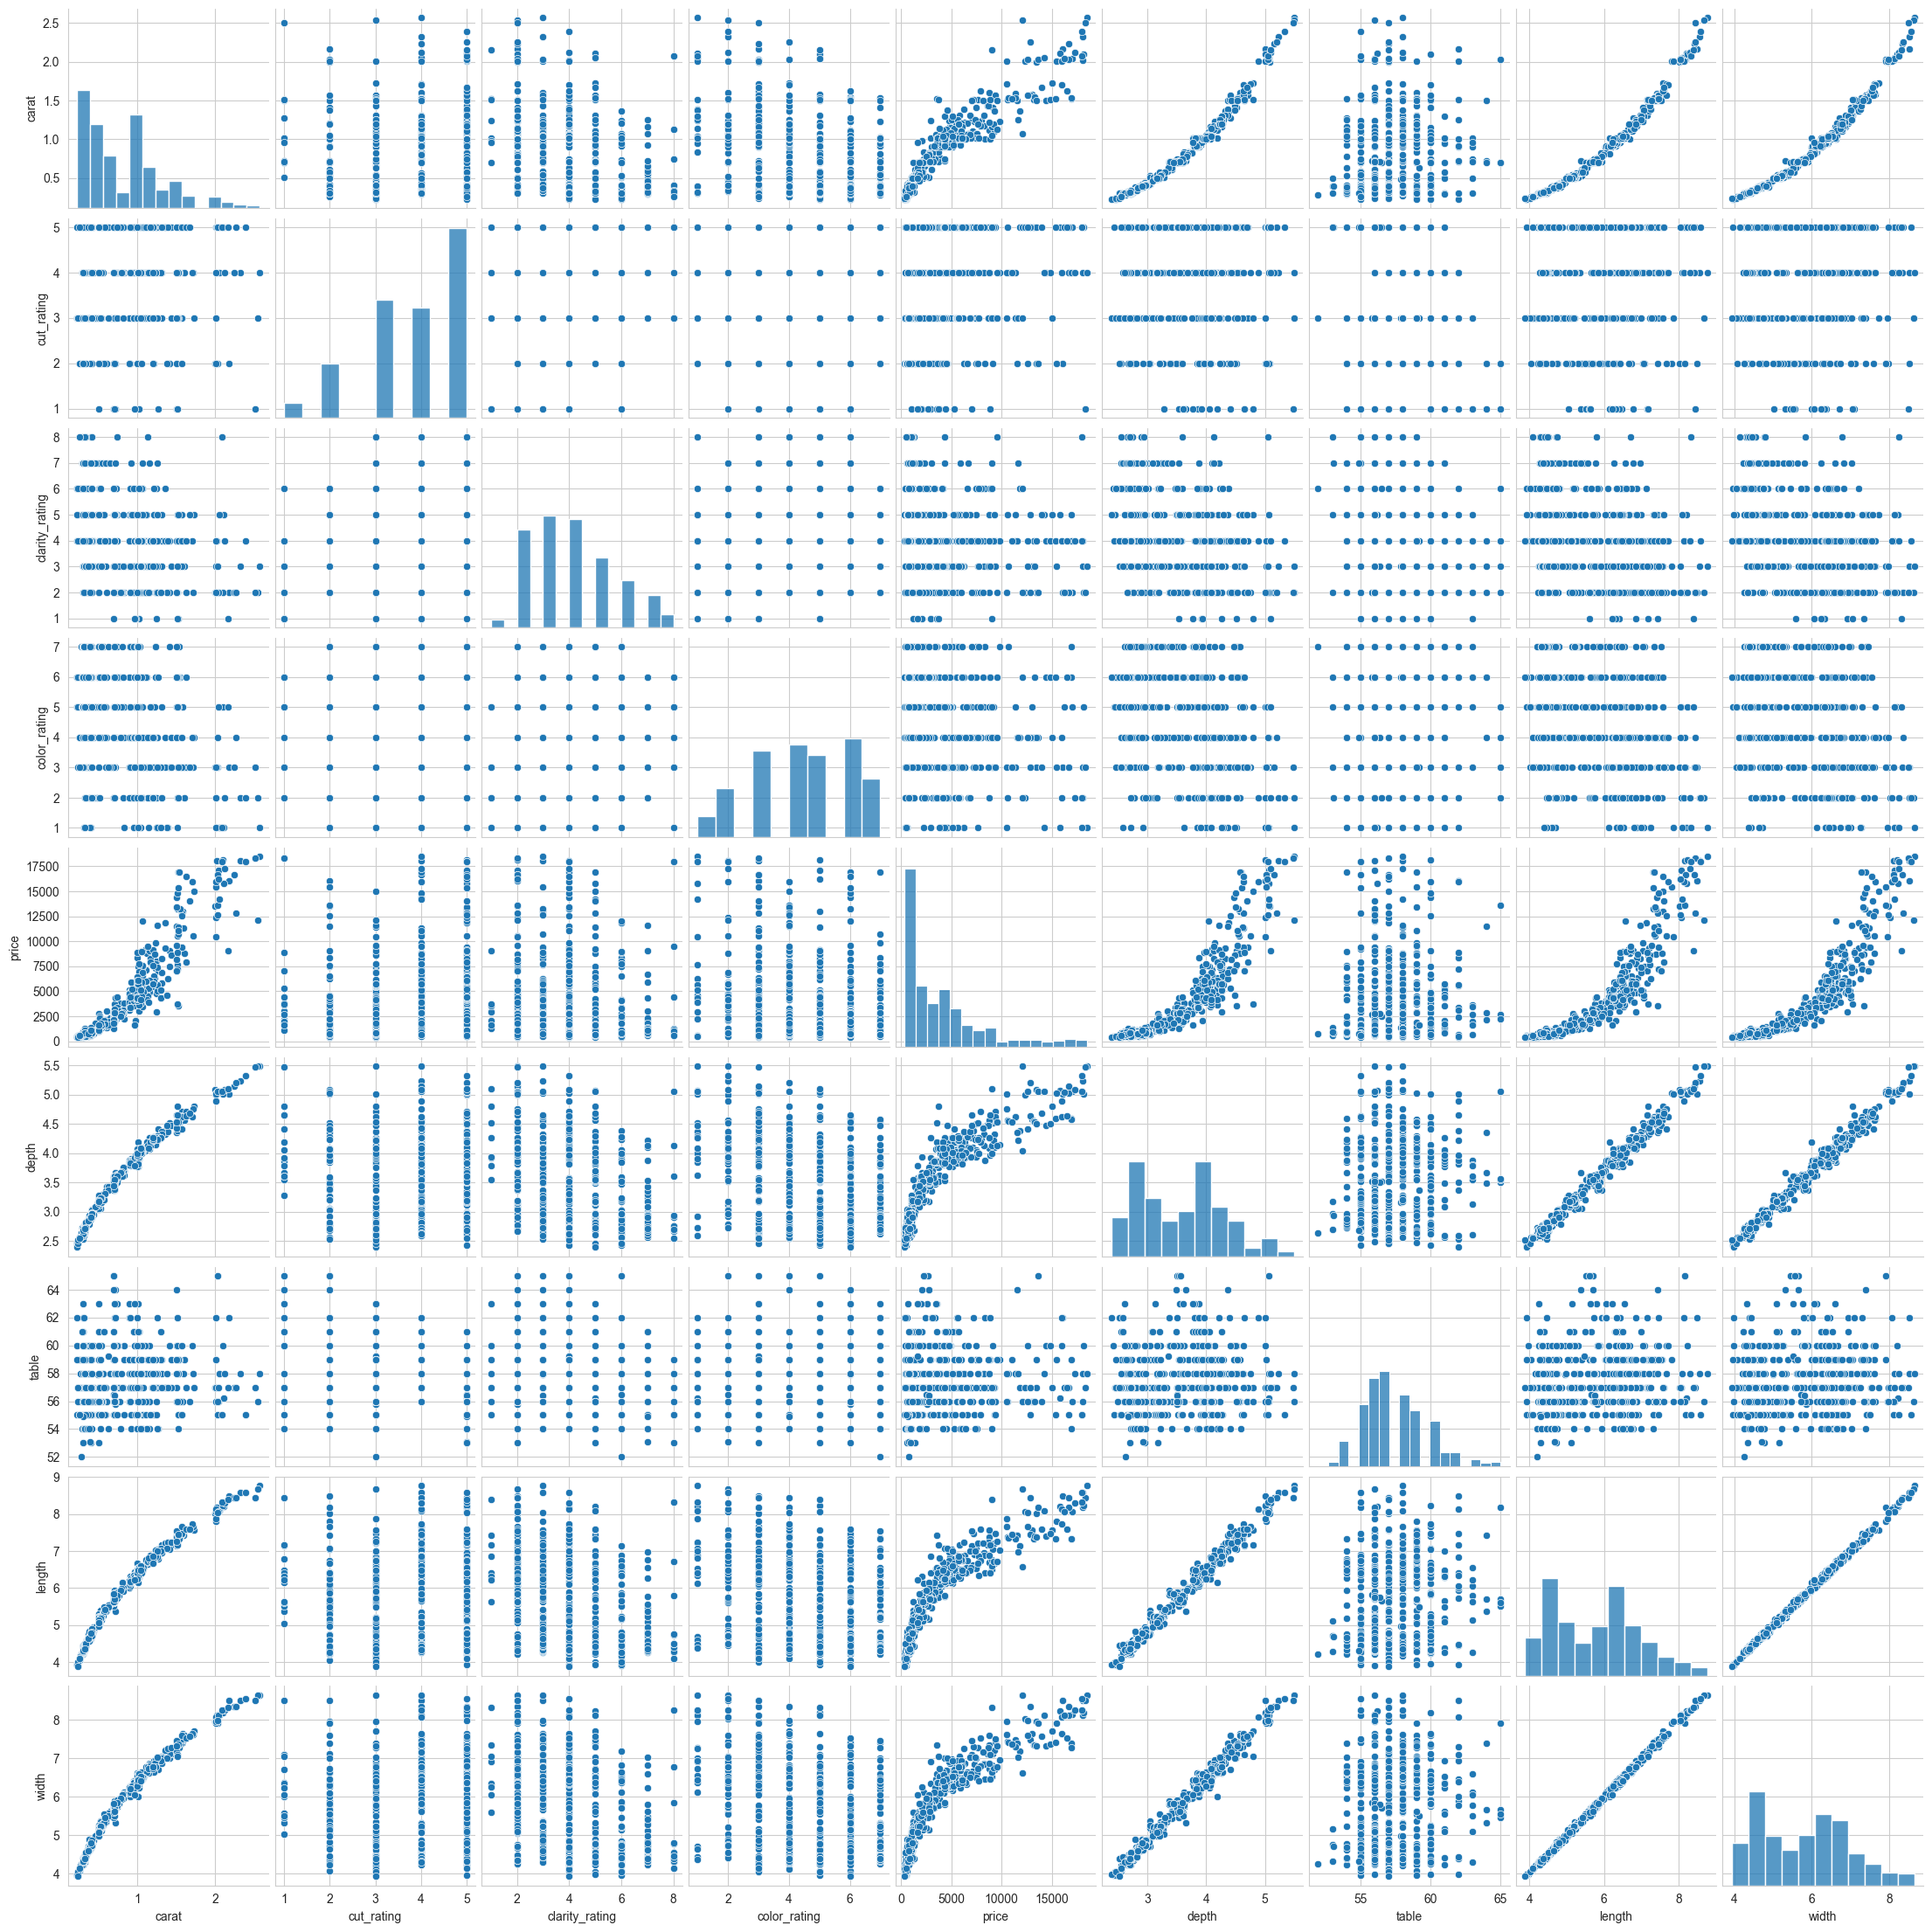

In [21]:
# Generate pair plot
sns.pairplot(filtered_df)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = filtered_df[['carat', 'cut_rating', 'clarity_rating', 'color_rating', 'depth', 'table', 'length', 'width']]
y = filtered_df['price']

In [24]:
y.describe()

count      500.000000
mean      4161.310000
std       4202.128982
min        367.000000
25%        990.000000
50%       2729.000000
75%       5643.000000
max      18485.000000
Name: price, dtype: float64

In [25]:
# price_range = filtered_df['price'].max() - filtered_df['price'].min()

In [26]:
# price_scaled = (df['price'] - df['price'].min()) / price_range

In [27]:
# price_scaled = price_scaled * 100

In [28]:
# y = price_scaled

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

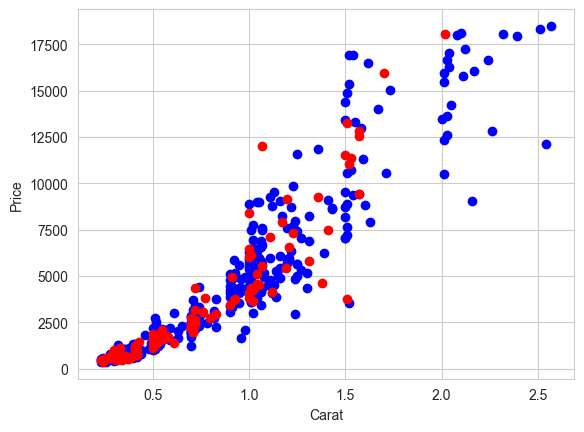

In [30]:
plt.scatter(X_train['carat'], y_train, color='blue')
plt.scatter(X_test['carat'], y_test, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_baseline = lr_model.fit(X_train, y_train)
y_predict = lr_baseline.predict(X_test)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_baseline.coef_})

print(coef_df)

print ('Coefficients: ', lr_baseline.coef_)
print ('Intercept: ', lr_baseline.intercept_)

          Feature   Coefficient
0           carat  11997.856179
1      cut_rating     76.761073
2  clarity_rating    490.789107
3    color_rating    373.315733
4           depth  -1991.329119
5           table    -26.285283
6          length  -2775.964161
7           width   2658.829921
Coefficients:  [11997.85617885    76.76107288   490.78910653   373.31573312
 -1991.32911862   -26.28528262 -2775.96416092  2658.82992132]
Intercept:  -377.376842061969


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2-score: %.6f" % r2)

MAE: 774.92
MSE: 1323601.12
RMSE: 1150.48
R2-score: 0.907090


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.model_selection import KFold

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [35]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3],
}

lr_poly = GridSearchCV(estimator, params, cv=kf)

In [36]:
for train_index, test_index in kf.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')
    Xcv_train, Xcv_test, ycv_train, ycv_test = (X.iloc[train_index, :],
                                                    X.iloc[test_index, :],
                                                    y[train_index],
                                                    y[test_index])

Train index: [ 1  3  4  5  7  8 10 11 12 13] 266
Test index: [ 0  2  6  9 15 19 23 25 26 27] 134

Train index: [ 0  2  6  8  9 10 11 12 13 15] 267
Test index: [ 1  3  4  5  7 14 16 17 22 30] 133

Train index: [ 0  1  2  3  4  5  6  7  9 14] 267
Test index: [ 8 10 11 12 13 18 20 21 24 28] 133



In [37]:
lr_poly.fit(Xcv_train, ycv_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [38]:
pf = PolynomialFeatures(degree=lr_poly.best_params_['polynomial_features__degree'])

lr_poly2 = Pipeline([("make_higher_degree", pf),
                    ("linear_regression", LinearRegression())])

lr_poly2 = lr_poly2.fit(Xcv_train, ycv_train)
lr_poly2.score(Xcv_train, ycv_train)

0.9802951341330641

In [39]:
lr_poly2.named_steps["make_higher_degree"].get_feature_names_out()

array(['1', 'carat', 'cut_rating', 'clarity_rating', 'color_rating',
       'depth', 'table', 'length', 'width', 'carat^2', 'carat cut_rating',
       'carat clarity_rating', 'carat color_rating', 'carat depth',
       'carat table', 'carat length', 'carat width', 'cut_rating^2',
       'cut_rating clarity_rating', 'cut_rating color_rating',
       'cut_rating depth', 'cut_rating table', 'cut_rating length',
       'cut_rating width', 'clarity_rating^2',
       'clarity_rating color_rating', 'clarity_rating depth',
       'clarity_rating table', 'clarity_rating length',
       'clarity_rating width', 'color_rating^2', 'color_rating depth',
       'color_rating table', 'color_rating length', 'color_rating width',
       'depth^2', 'depth table', 'depth length', 'depth width', 'table^2',
       'table length', 'table width', 'length^2', 'length width',
       'width^2'], dtype=object)

In [40]:
y_poly2_pred = lr_poly2.predict(Xcv_test)

In [41]:
r2_score(ycv_test, y_poly2_pred)

0.944386642313043

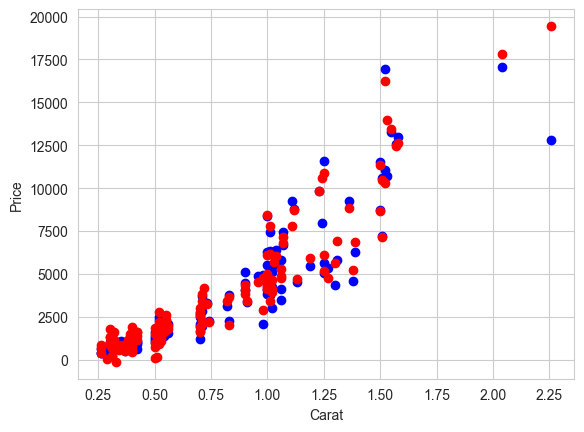

In [42]:
plt.scatter(Xcv_test['carat'], ycv_test, color='blue')
plt.scatter(Xcv_test['carat'], y_poly2_pred, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [43]:
mae = mean_absolute_error(ycv_test, y_poly2_pred)
mse = mean_squared_error(ycv_test, y_poly2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ycv_test, y_poly2_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2-score: %.6f" % r2)

MAE: 489.25
MSE: 729044.32
RMSE: 853.84
R2-score: 0.944387


In [44]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [45]:
from sklearn.linear_model import Lasso

estimator2 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': [0.0001,0.001,0.05,0.1,1]
}

lr_opt = GridSearchCV(estimator2, params2, cv=kf)

In [46]:
lr_poly_opt = lr_opt.fit(Xcv_train, ycv_train)

/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+07, tolerance: 2.894e+05
  model = cd_fast.enet_coordinate_descent(
/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+08, tolerance: 3.301e+05
  model = cd_fast.enet_coordinate_descent(
/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

In [47]:
lr_poly_opt.best_score_, lr_poly_opt.best_params_

(0.9683128246555954,
 {'lasso_regression__alpha': 1, 'polynomial_features__degree': 2})

In [48]:
lr_poly2_l1_001 = Pipeline([("scaler", StandardScaler()),
                            ("polynomial_features", PolynomialFeatures(degree=lr_poly_opt.best_params_['polynomial_features__degree'])),
                            ("lasso_regression", Lasso(alpha=lr_poly_opt.best_params_['lasso_regression__alpha']))])

lr_poly2_l1 = lr_poly2_l1_001.fit(Xcv_train, ycv_train)
lr_poly2_l1.score(Xcv_train, ycv_train)

/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+07, tolerance: 4.837e+05
  model = cd_fast.enet_coordinate_descent(


0.9795020886458953

In [49]:
y_lr_poly2_l1_pred = lr_poly2_l1.predict(Xcv_test)

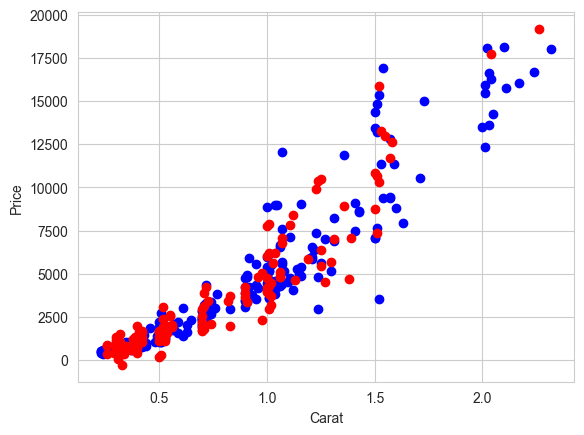

In [50]:
plt.scatter(Xcv_train['carat'], ycv_train, color='blue')
plt.scatter(Xcv_test['carat'], y_lr_poly2_l1_pred, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [51]:
mae = mean_absolute_error(ycv_test, y_lr_poly2_l1_pred)
mse = mean_squared_error(ycv_test, y_lr_poly2_l1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ycv_test, y_lr_poly2_l1_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("MSE: %.2f" % rmse)
print("R2-score: %.6f" % r2)

MAE: 463.54
MSE: 659583.38
MSE: 812.15
R2-score: 0.949685
